In [1]:
import pandas as pd
import pathlib, os, math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Experiment

### Items (m): 100
### Samples (s_samples): 100
### Noise runs (n_runs): 100
### DAG structure: X and Y have varyingly correlated parents


## Tested each sample for 3 metrics across error correlation levels between 0 and 1, and across error standard deviations between 0 and 2.

In [2]:
base_repo_dir = pathlib.Path(os.getcwd()).parents[1]
pd.set_option('display.max_columns', 100)

In [3]:
metrics=["kendalls_tau",
         "subgroup_kt",
         "change_in_cond_exp_rank"]

exp_dfs=[]
for m in metrics:
    
    exp_dfs.append(pd.read_pickle(base_repo_dir/'out'/'distance_metrics'/'inter_corr'/m/'expected.pkl',
                         compression='gzip'))


corr_vals = sorted(list(set([float(x[0][5:]) for x in exp_dfs[0].index.values])))

In [4]:
col_linestyle_dict = {'exp_exp_noise':'solid', 
                      'exp_nonres':'dotted', 
                      'exp_xres':'dashed'}

err_sds = sorted(list(set([float(x[1][3:]) for x in exp_dfs[0].index.values])))

color_pal = sns.color_palette("ch:s=-.2,r=.6", len(corr_vals))

color_dict = {corr_vals[i]:color_pal[i] for i in range(len(corr_vals))}


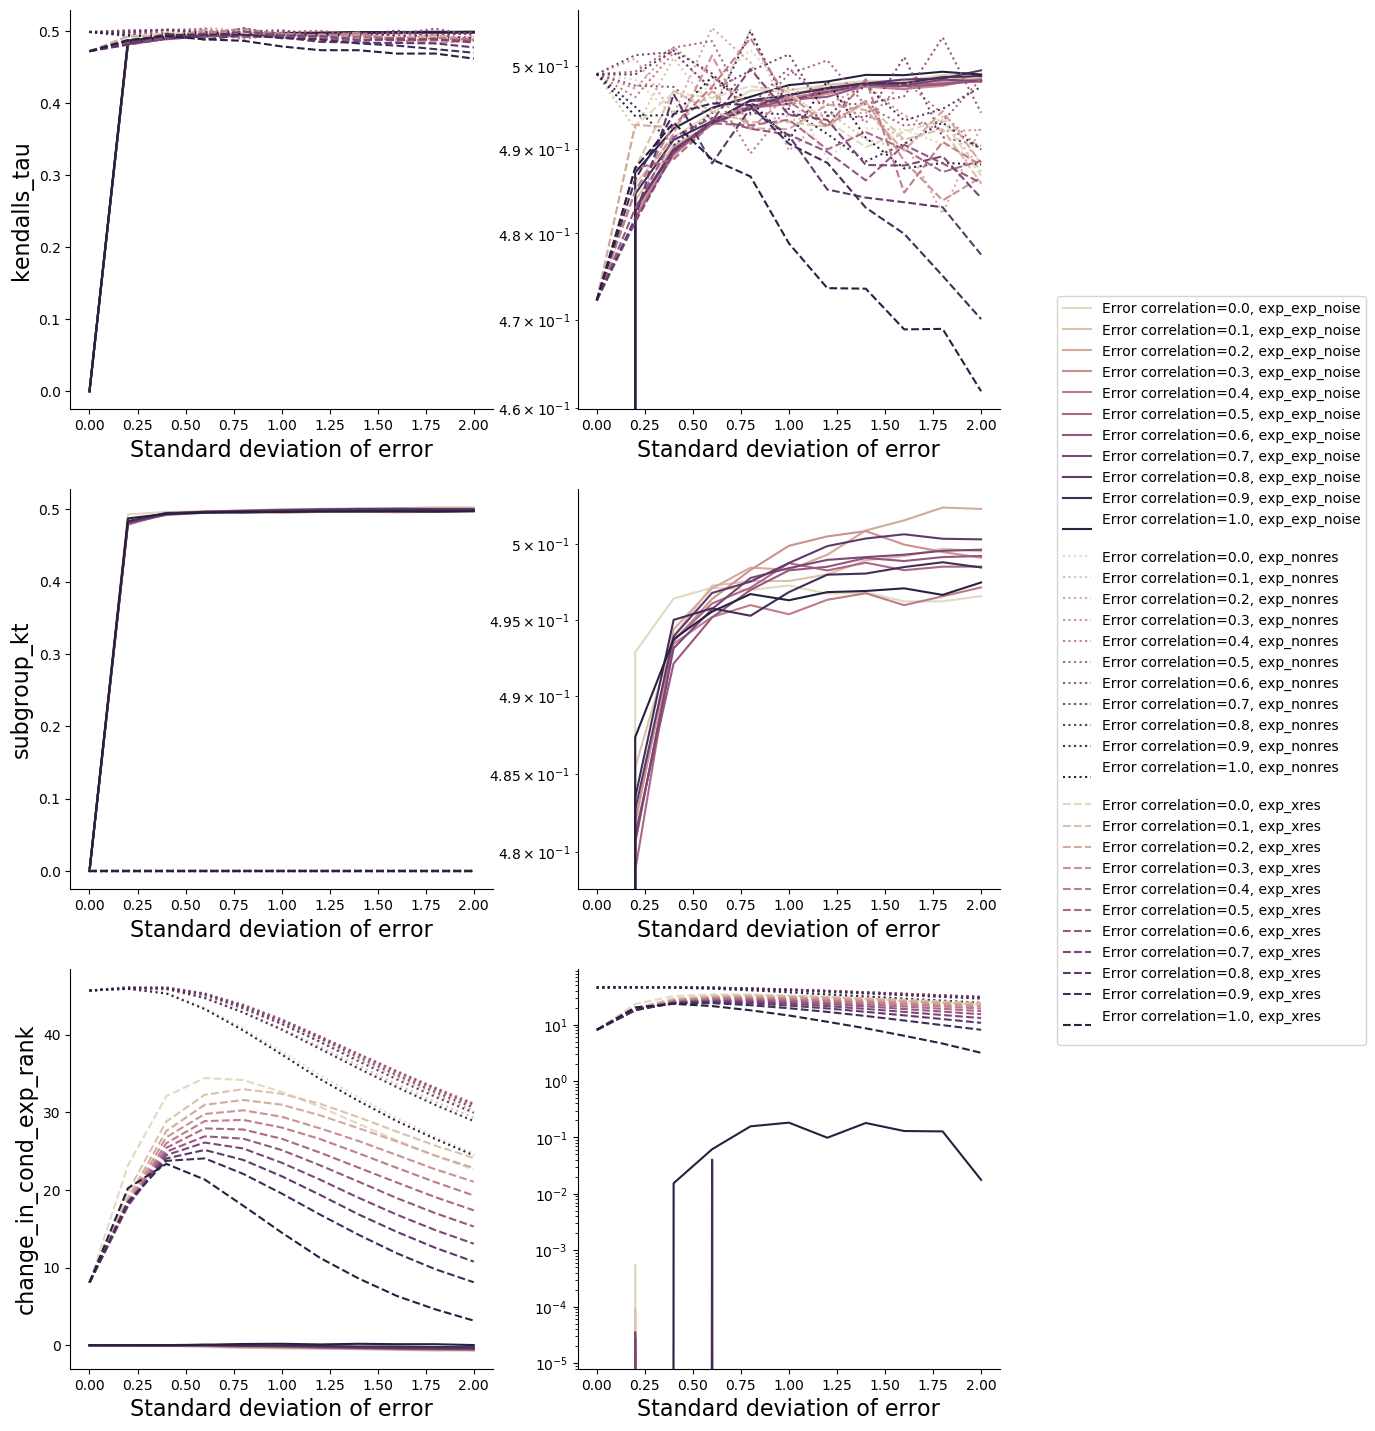

In [5]:
fig, ax = plt.subplots(len(metrics), 2, figsize=(12,6*len(metrics)), dpi=100)

for i in range(len(metrics)):
    
    # make spines invisible
    ax[i][0].spines['right'].set_visible(False)
    ax[i][1].spines['right'].set_visible(False)
    ax[i][0].spines['top'].set_visible(False)
    ax[i][1].spines['top'].set_visible(False)

    for col in exp_dfs[0].columns:
        for corr_val in corr_vals:
            
            # Add blank space for legend
            formatted_col = col
            if corr_val==1.0:
                formatted_col = col+"\n"
               
            # Invert change in expected rank
            flip=1
            if i==2:
                flip=-1
            
            # Plot linear scale
            ax[i][0].plot(err_sds, flip*exp_dfs[i].loc['corr_{}'.format(corr_val)][col], 
                         color=color_dict[corr_val],
                         linestyle=col_linestyle_dict[col],
                         label='Error correlation={}, {}'.format(corr_val, formatted_col))

            # Plot log scale
            ax[i][1].semilogy(err_sds, flip*exp_dfs[i].loc['corr_{}'.format(corr_val)][col], 
                         color=color_dict[corr_val],
                         linestyle=col_linestyle_dict[col],
                         label='Error correlation={}, {}'.format(corr_val, formatted_col))
            
    

    ax[i][0].set_ylabel(metrics[i], size=16)

    ax[i][0].set_xlabel('Standard deviation of error', size=16)
    ax[i][1].set_xlabel('Standard deviation of error', size=16)
    
ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.5, 1.5))
    
plt.show()

#### Questions
- Why does conditional expected rank go up and down?
- Why does Kendall's Tau go so quickly to 0.5, as opposed to what we've seen in previous experiments? Could this be due to having more rows here?